<a href="https://colab.research.google.com/github/GaneshPelluru/Cattle_Health-Prediction/blob/main/Cattle_Health_Monitoring_by_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Drive Folders

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libaries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
%matplotlib inline

# Load Data from CSV

In [7]:
df = pd.read_csv("/content/drive/MyDrive/cow disease prediction/Copy of cattle_dataset(1).csv")
df

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,39.9,Cross Breed,6.8,28,6942,7.1,4,47,1.9,15.0,3.1,3,Fresh blood in faeces,unhealthy
174,40.2,Cross Breed,7.2,20,6652,6.5,4,41,2.0,15.5,3.6,4,Black faeces,unhealthy
175,39.8,Cross Breed,7.7,16,6705,6.6,3,37,2.6,14.8,4.2,3,extremely firm,unhealthy
176,39.5,Cross Breed,5.7,21,6272,6.8,3,45,2.2,15.0,3.1,2,very liquid faeces,unhealthy


In [8]:
df.head()

,body_temperature,breed_type,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill,faecal_consistency,health_status
0,38.2,Cross Breed,13.6,36,12432,3.5,3,50,3.2,15.0,6.0,3,extremely firm,unhealthy
1,38.9,Normal Breed,24.1,37,11987,4.2,2,62,3.9,12.2,5.8,4,ideal,healthy
2,38.6,Cross Breed,14.7,42,13121,3.2,3,71,3.0,12.6,5.9,2,ideal,healthy
3,39.5,Normal Breed,26.2,29,12055,3.8,4,68,3.6,13.5,6.0,2,Black faece,unhealthy
4,39.7,Normal Breed,22.5,48,10352,4.6,2,63,3.1,13.5,6.3,5,ideal,healthy


# Checking wether null values present and clean up

In [9]:
df.isnull().sum()

,0
body_temperature,0
breed_type,0
milk_production,0
respiratory_rate,0
walking_capacity,0
sleeping_duration,0
body_condition_score,0
heart_rate,0
eating_duration,0
lying_down_duration,0


In [10]:
df.describe()

,body_temperature,milk_production,respiratory_rate,walking_capacity,sleeping_duration,body_condition_score,heart_rate,eating_duration,lying_down_duration,ruminating,rumen_fill
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,39.011236,14.770787,28.685393,9303.179775,4.934831,2.910112,53.955056,2.825843,13.957303,4.888764,2.741573
std,0.872225,6.615735,9.768617,3237.390592,1.559668,1.254510,13.157808,0.760542,1.512650,1.173477,1.047225
min,35.500000,5.100000,14.000000,5004.000000,2.800000,1.000000,37.000000,1.300000,6.000000,3.000000,1.000000
25%,38.300000,9.700000,21.000000,6019.000000,3.500000,2.000000,42.000000,2.200000,12.900000,3.600000,2.000000
50%,38.900000,13.600000,28.000000,11203.000000,4.200000,3.000000,50.000000,2.900000,13.800000,5.000000,3.000000
75%,39.700000,21.200000,36.000000,12291.000000,6.500000,4.000000,63.000000,3.400000,15.100000,5.900000,3.000000
max,40.600000,26.500000,49.000000,13257.000000,7.200000,5.000000,83.000000,4.900000,16.400000,7.000000,5.000000


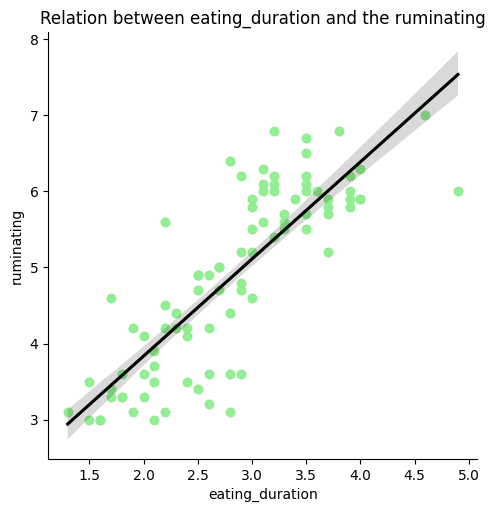

In [15]:
sns.lmplot(data=df,x="eating_duration",y="ruminating",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between eating_duration and the ruminating")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


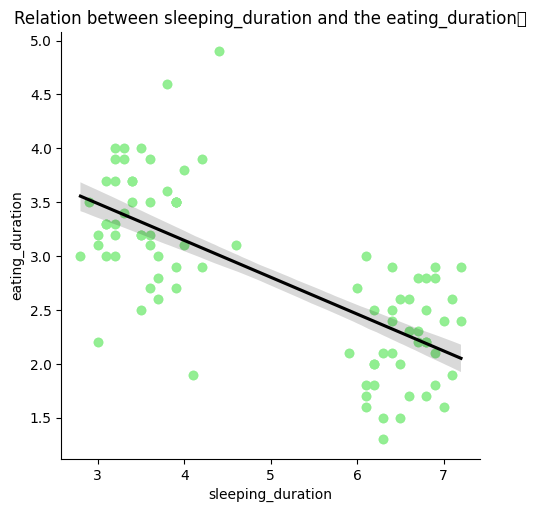

In [14]:
sns.lmplot(data=df,x="sleeping_duration",y="eating_duration",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between sleeping_duration and the eating_duration	")
plt.show()

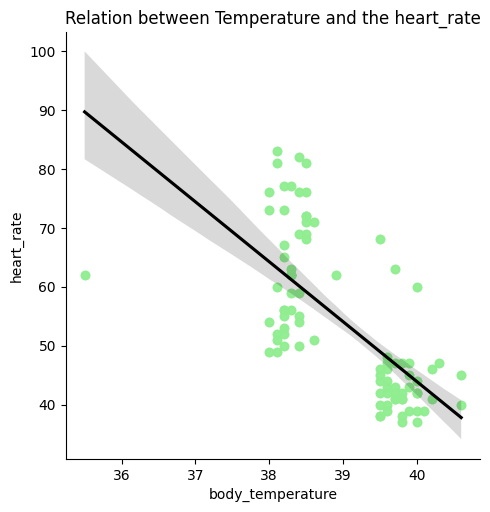

In [12]:
sns.lmplot(data=df,x="body_temperature",y="heart_rate",scatter_kws={'color':'lightgreen'},line_kws={'color':'black'})
plt.title("Relation between Temperature and the heart_rate")
plt.show()

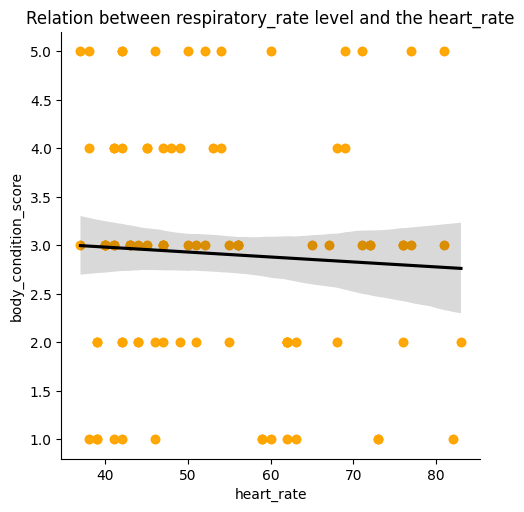

In [17]:
sns.lmplot(data=df,x="heart_rate",y="body_condition_score",scatter_kws={'color':'orange'},line_kws={'color':'black'})
plt.title("Relation between body_condition_score level and the heart_rate")
plt.show()

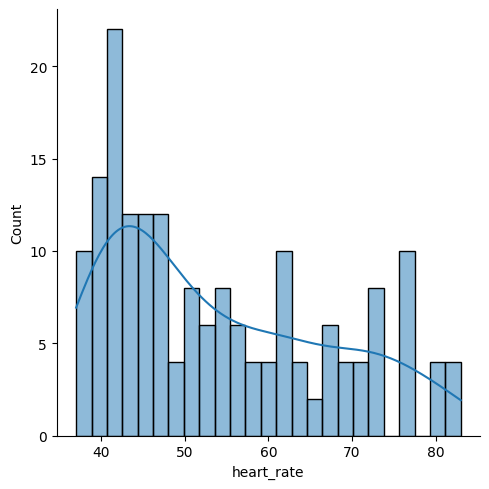

In [18]:
sns.displot(data=df, x="heart_rate", kde=True, bins=25)
plt.show()

# Clean Data

Basic visualization

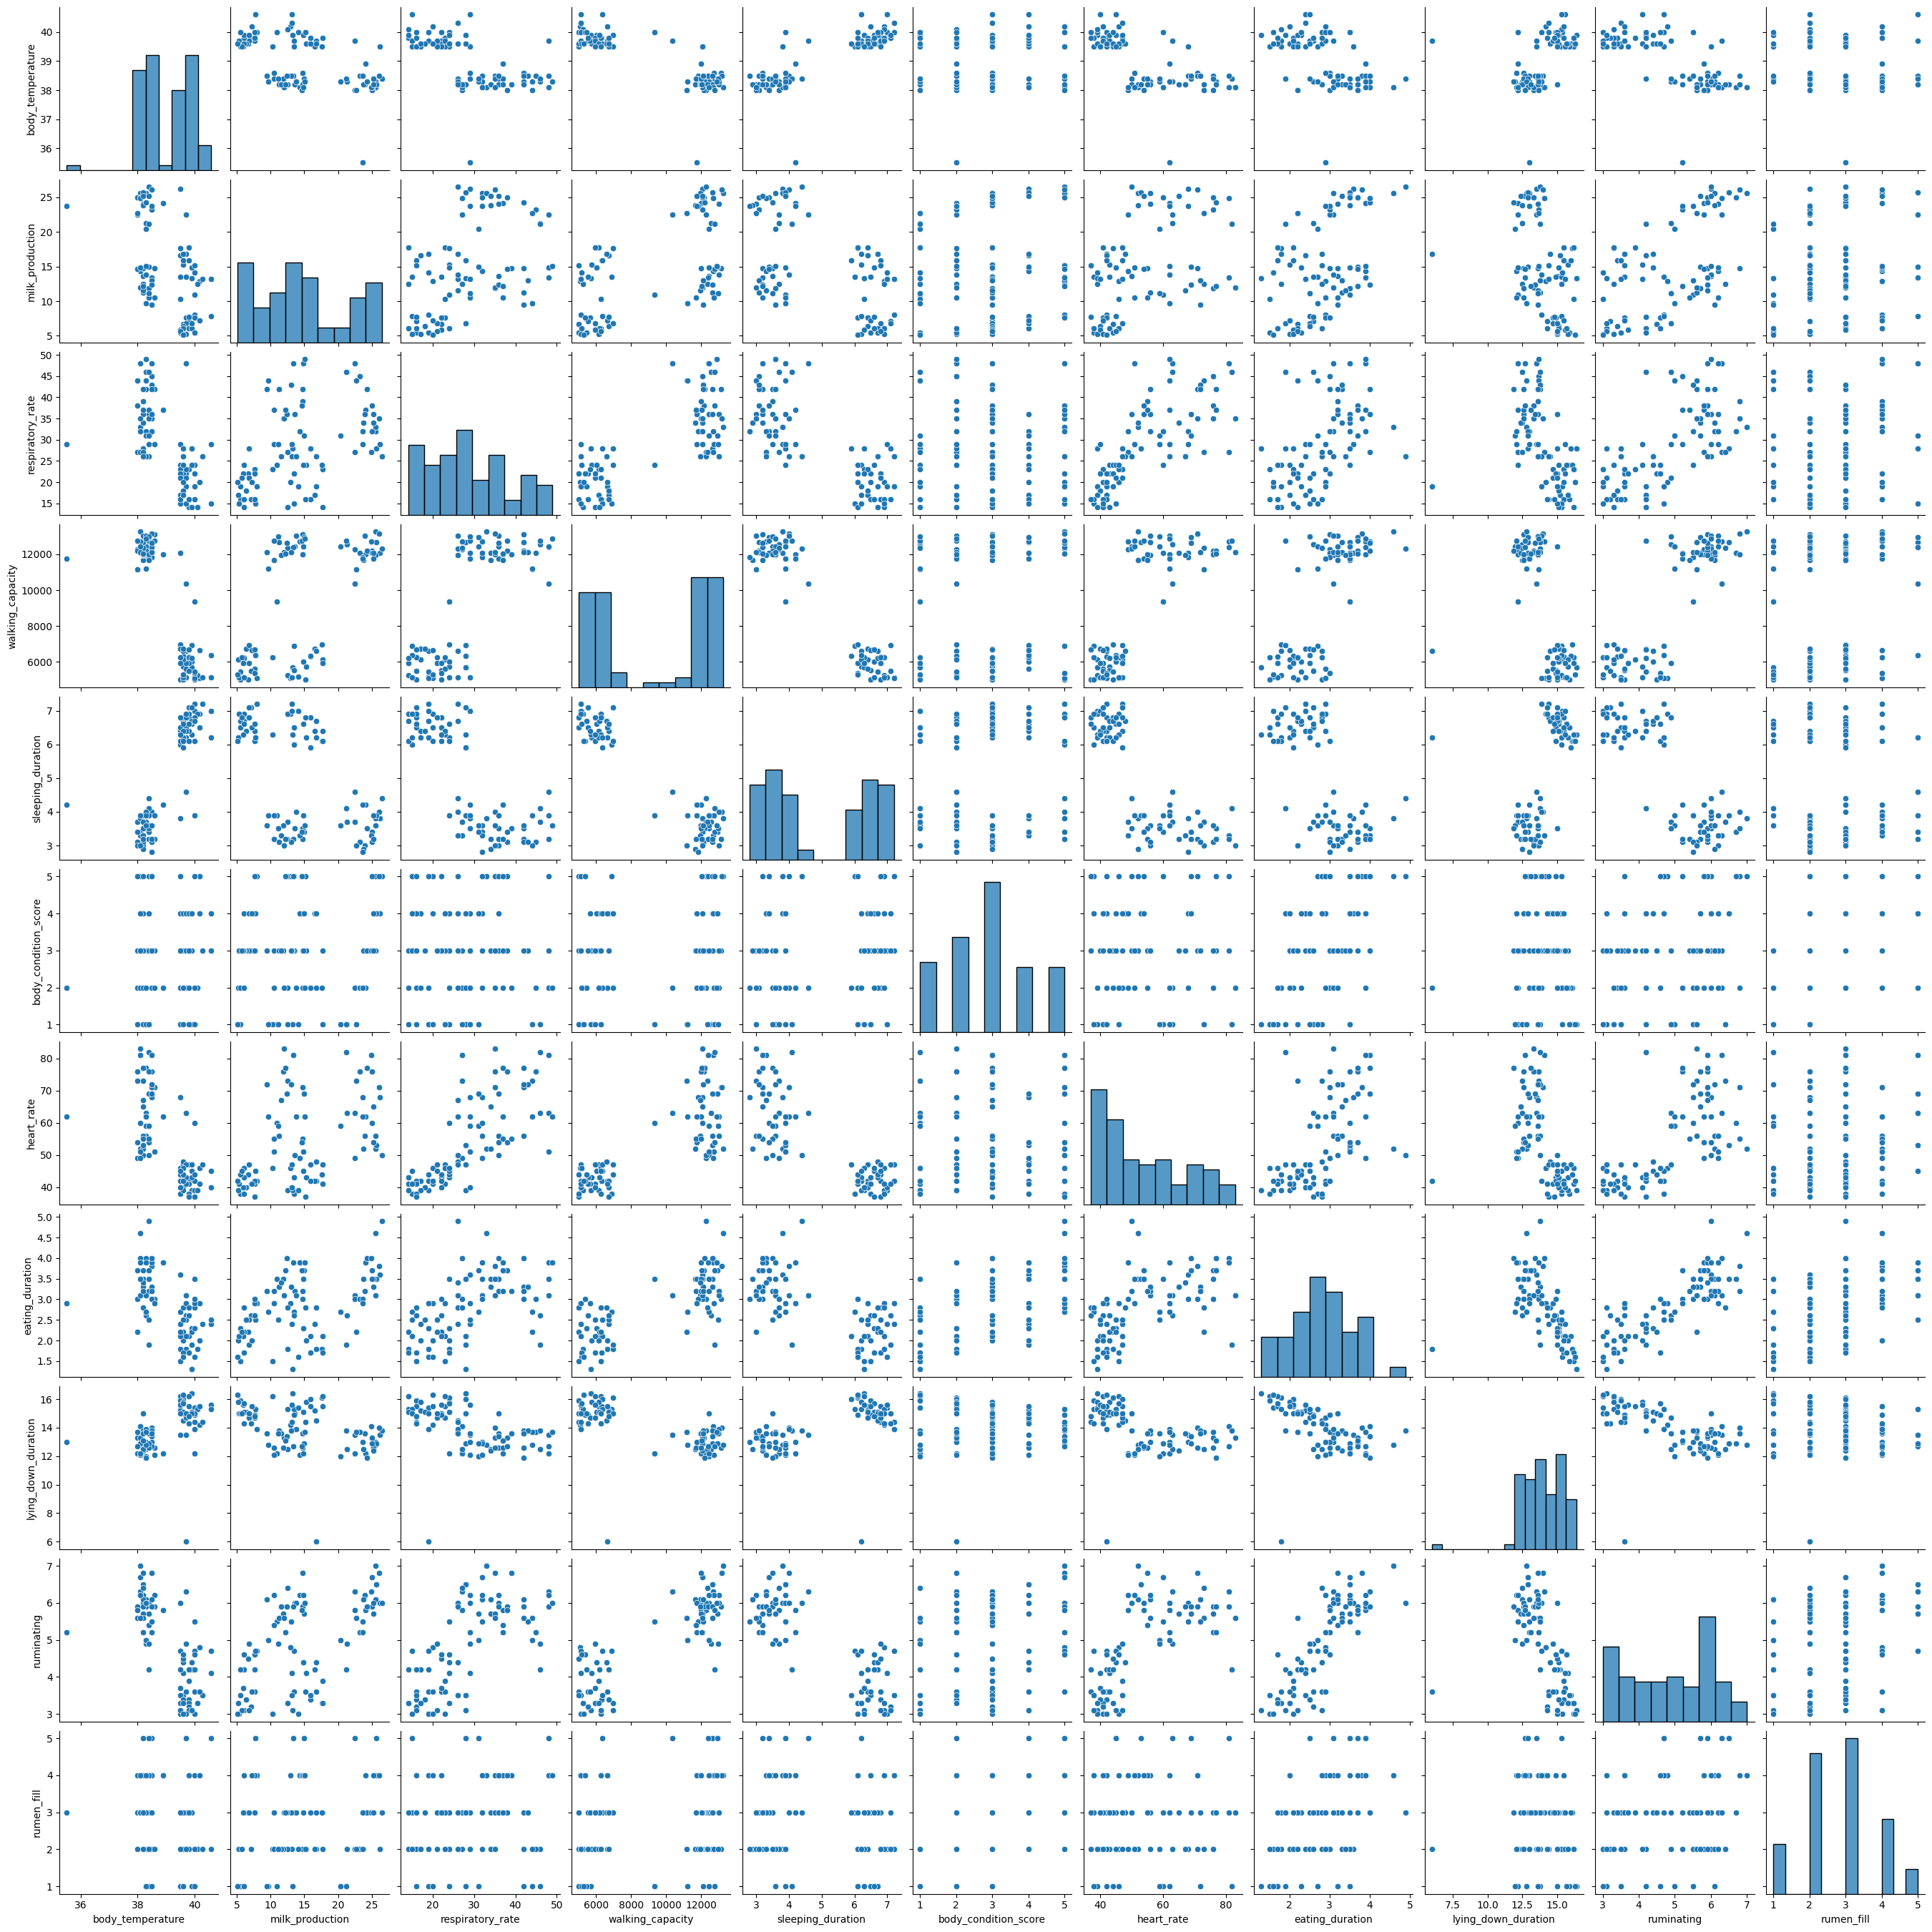

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
def checks_null_values(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False)
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False)
        percent = mask_percent[mask_percent > 0] * 100

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by=['Total'], ascending=False)

        return missing_data
    else:
        print('No NaN found.')

def _check_df(df):
    # Empty Dataframe check
    assert df.shape[0]>0 and df.shape[1]>0 , "DataFrame is Empty"
    # duplicate columns check
    assert len(df.columns.values)==len(set(df.columns.values)) , "DataFrame has duplicate columns"


def most_common_value(df):
    # for simple cases use df.mode().T
    _check_df(df)
    total_rows = df.shape[0]
    columns,modes,counts = list(),list(),list()
    for column in df.columns:
        count = df[column].value_counts().max()
        mode = df[column].value_counts().index[0]
        columns.append(column)
        modes.append(mode)
        counts.append(count)
    description = pd.DataFrame(index=columns,data={"Most Frequent Value":modes,"Most Frequent Value Count":counts})
    description["Most Frequent Value %"] = 100 * description["Most Frequent Value Count"]/total_rows
    description.index.names = ["Column"]
    return description

def histogram_plot(df, numerical_columns):
    '''
    Takes df, numerical columns as list
    Returns a group of histagrams
    '''
    f = pd.melt(df, value_vars=numerical_columns)
    g = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g


def heatmap_plot(df, dependent_variable):
    '''
    Takes df, a dependant variable as str
    Returns a heatmap of all independent variables' correlations with dependent variable
    '''
    plt.figure(figsize=(8, 10))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable),
                    annot=True,
                    cmap='coolwarm',
                    vmin=-1,
                    vmax=1)
    return g

def corr_list(df):

      return  (df.corr()
          .unstack()
          .sort_values(kind="quicksort",ascending=False)
          .drop_duplicates().iloc[1:]); df_out


def box_plot(df, col_name, title=None, xlabel=None):
    """
    Draw's a single horizontal boxplot
    Parameters
    ----------
    df : Pandas Data Frame
    col_name : column name in data frame
    title : Plot title
    xlabel : X-axis label
    ylabel : Y-axis label
    """
    fig = plt.figure(figsize=(10, 6))  # define plot area
    ax = fig.add_subplot(111)  # add single subplot
    sns.boxplot(df[col_name], ax=ax)  # Use seaborn plot
    if not title:
        title = 'Boxplot of {}'.format(col_name)
    ax.set_title(title)  # Give the plot a main title
    if not xlabel:
        xlabel = col_name
    ax.set_xlabel(xlabel)  # Set text for the x axis


def bar_plot(df, col_name, title=None, xlabel=None, ylabel='Count'):
    """
    Draw's a single bar plot
    Parameters
    ----------
    df : Pandas Data Frame
    col_name : column name in data frame
    title : Plot title
    xlabel : X-axis label
    ylabel : Y-axis label
    """
    fig = plt.figure(figsize=(10, 6))  # define plot area
    ax = fig.add_subplot(111)  # add single subplot
    ax = df[col_name].value_counts().plot.bar(
        color='steelblue')  # Use pandas bar plot
    if not title:
        title = 'Barplot of {}'.format(col_name)
    ax.set_title(title)  # Give the plot a main title
    if not xlabel:
        xlabel = f'No. of {col_name}'
    ax.set_xlabel(xlabel)  # Set text for the x axis
    ax.set_ylabel(ylabel)  # Set text for the y axis
# Check for null values inside the DF
checks_null_values(df)

No NaN found.


# Histogram Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packa

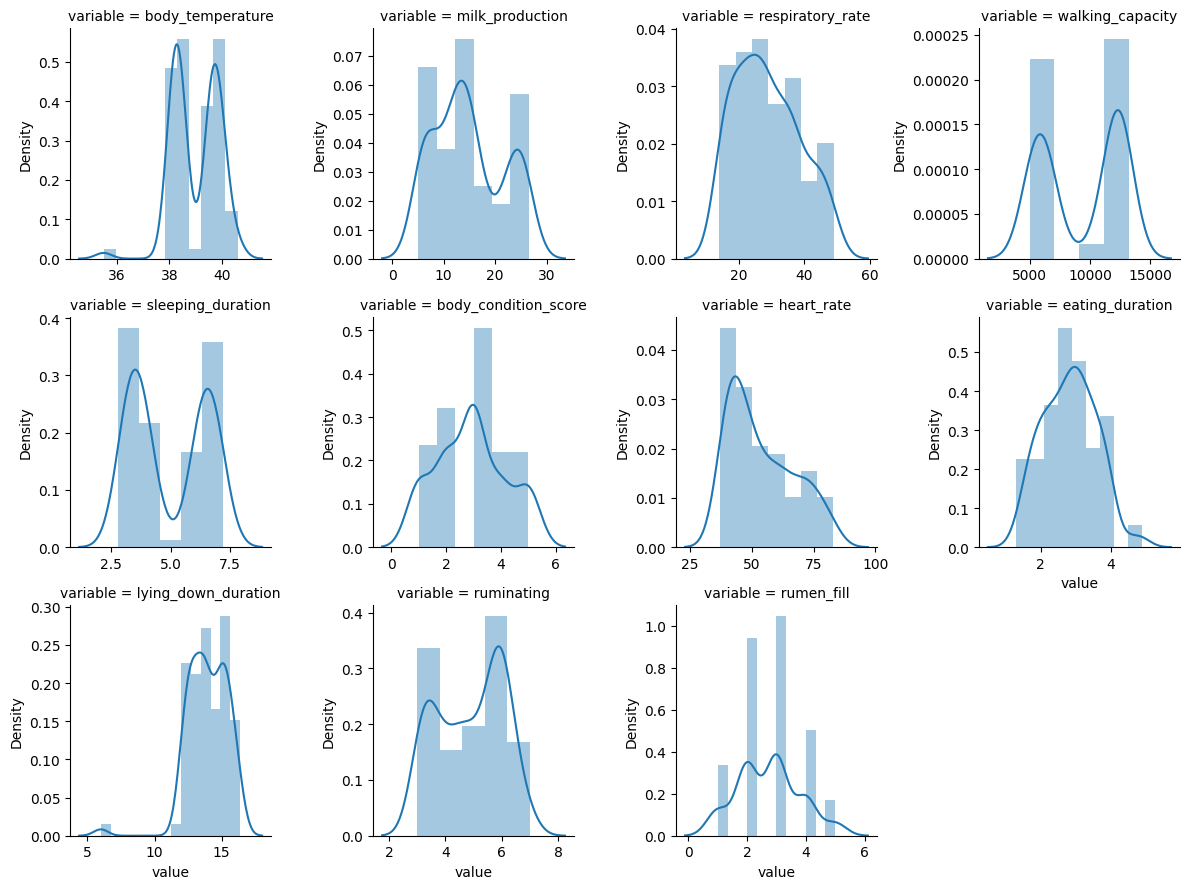

In [21]:
histogram_plot(df, ['body_temperature','milk_production','respiratory_rate','walking_capacity','sleeping_duration','body_condition_score','heart_rate','eating_duration','lying_down_duration','ruminating','rumen_fill'])

# Find Correlations and R squared values

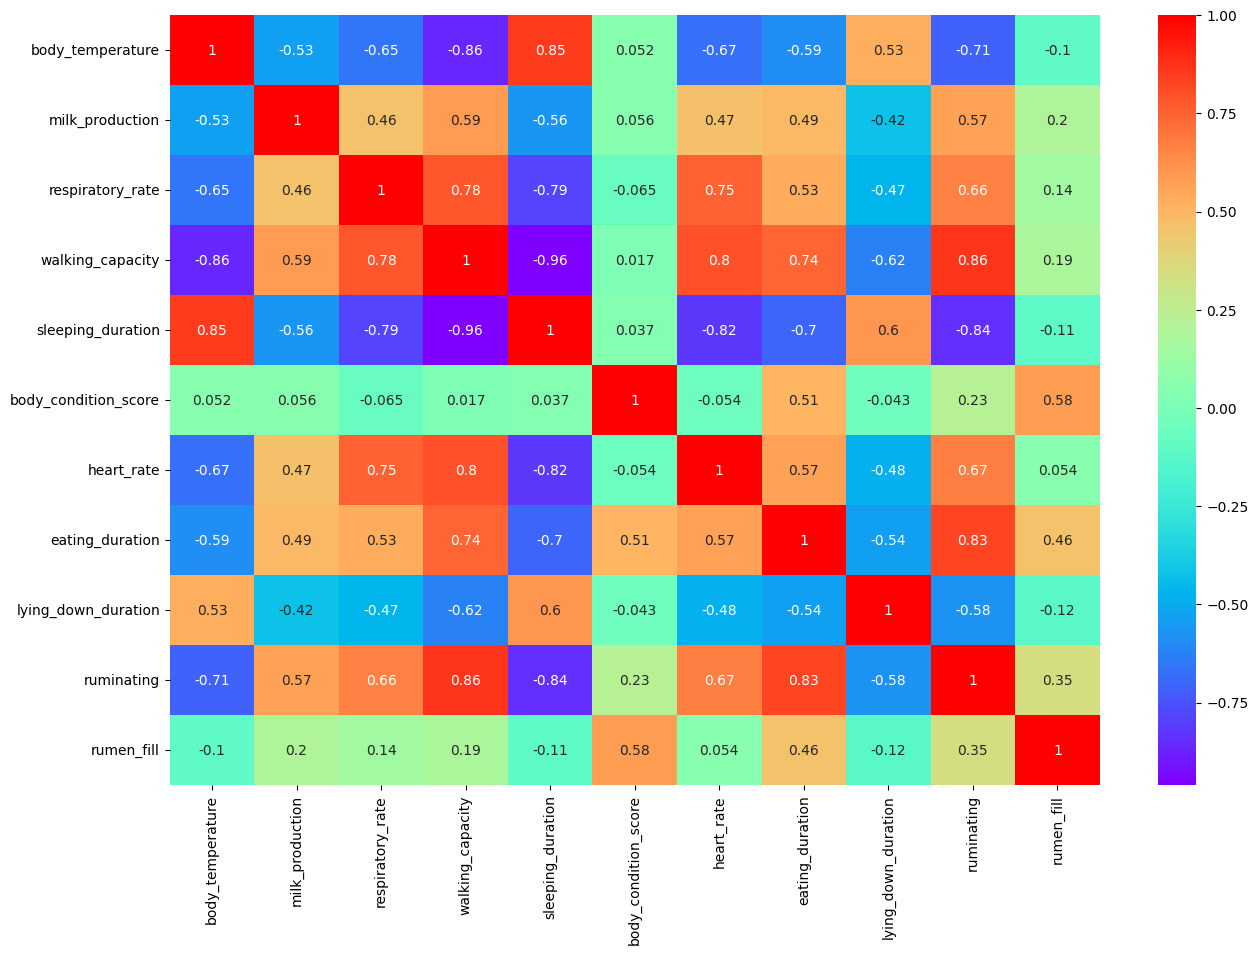

In [23]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Create the heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(numerical_df.corr(), cmap="rainbow", annot=True)
plt.show()

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Assuming you have a DataFrame named 'df' with the data
# Replace 'your_file.csv' with the actual path to your CSV file if needed


# Create a list to store the column names and data
col = []
data = []

# Iterate through each column, excluding 'heart_rate'
for column in df.drop(['heart_rate'], axis=1).columns:
    # Ensure numerical data
    if df[column].dtype == np.number:
        y = df[column]
        x = df['heart_rate']
        col.append(column)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        data.append([slope, intercept, r_value, p_value, std_err])

# Create a DataFrame with the results
df_r = pd.DataFrame(data, columns=["Slope", "Intercept", "R-Value", "P-Value", "Std Err"], index=col)

# Print the results in a tabular format
print(df_r.to_markdown(numalign="left", stralign="left"))

|                     | Slope      | Intercept   | R-Value   | P-Value     | Std Err    |
|:--------------------|:-----------|:------------|:----------|:------------|:-----------|
| body_temperature    | -0.0446523 | 41.4205     | -0.673595 | 6.9037e-25  | 0.00369311 |
| milk_production     | 0.236126   | 2.03058     | 0.469623  | 3.76829e-11 | 0.0334606  |
| sleeping_duration   | -0.0968723 | 10.1616     | -0.817243 | 5.47396e-44 | 0.00514916 |
| eating_duration     | 0.0328227  | 1.05489     | 0.567851  | 1.38649e-16 | 0.00358635 |
| lying_down_duration | -0.0554288 | 16.948      | -0.482149 | 9.46668e-12 | 0.00759184 |
| ruminating          | 0.0600552  | 1.64848     | 0.673379  | 7.23745e-25 | 0.00496997 |


<ipython-input-29-72af91ae285b>:16: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [30]:
r_value

0.6733790992634029

In [31]:
p_value

7.237446548084185e-25

In [32]:
r_squared = r_value**2
r_squared

0.4534394113247918

# Using the Kmeans Model to classify the water sample into 3 category

In [34]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

scaler = StandardScaler()

# Fit the scaler on numerical data only
scaler.fit(numerical_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Transform the numerical data
sampled_scaler = scaler.transform(numerical_df)

In [35]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=2023)

cluster = model.fit_predict(sampled_scaler)

level = pd.Series(cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


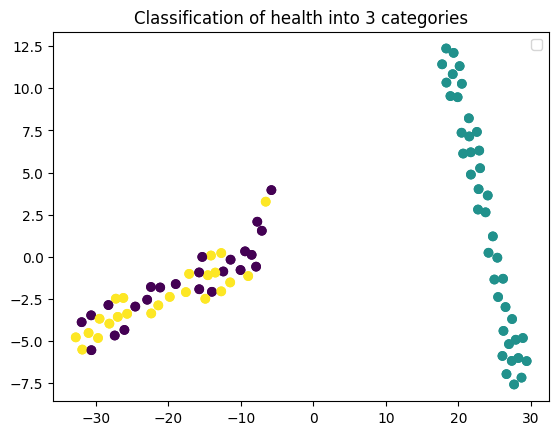

In [38]:
from sklearn.manifold import TSNE
import pandas as pd

# Assuming 'df' is your DataFrame and has string columns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

model = TSNE()

#Fit and transform only the numerical data
transformed_model = model.fit_transform(numerical_df)

xs = transformed_model[:,0]
ys =transformed_model[:,1]

plt.scatter(xs,ys,c=level)
plt.title("Classification of health into 3 categories")
plt.legend()
plt.show()

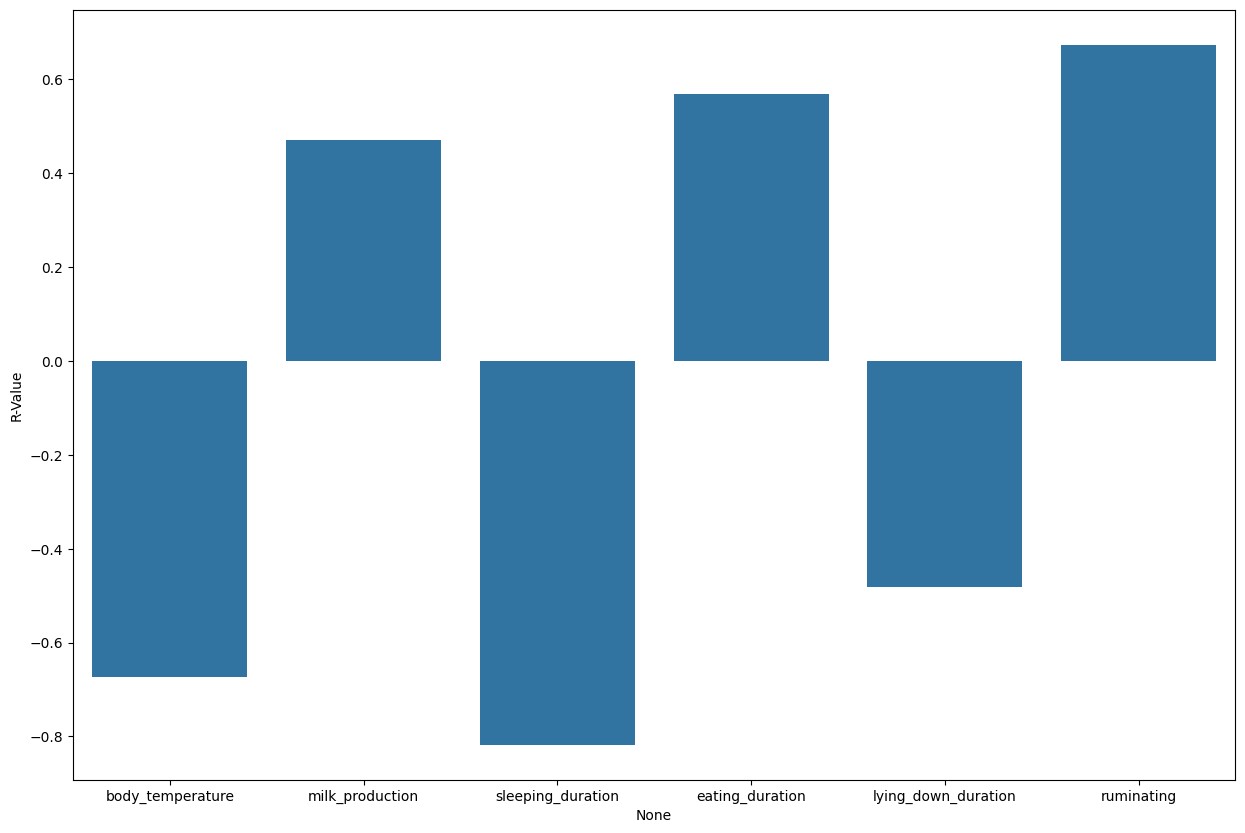

In [42]:
plt.subplots(figsize=(15,10))

# Check for typos and correct the column name if necessary
# For example, if the column name is "R2_Value", change "R2-Value" to "R2_Value"
sns.barplot(data=df_r, x=df_r.index, y="R-Value")

plt.show()